In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotly.express as px
import plotly.graph_objects as go
sns.set()

In [2]:
vc1 = pd.read_csv("daily_vacc.csv")
vc1

,Date,CA,CAQF,CAName,Population,PopulationQF,Dose,DoseQF,NumberVaccinated,NumberVaccinatedQF,PercentCoverage,PercentCoverageQF,CumulativeNumberVaccinated,CumulativeNumberVaccinatedQF,CumulativePercentCoverage,CumulativePercentCoverageQF
0,20201208,NaN,:,Unknown,NaN,z,Dose 1,NaN,2,NaN,NaN,z,2,NaN,NaN,z
1,20201208,NaN,:,Unknown,NaN,z,Dose 2,NaN,0,NaN,NaN,z,0,NaN,NaN,z
2,20201208,S12000005,NaN,Clackmannanshire,42594.0,NaN,Dose 1,NaN,68,NaN,0.159647,NaN,68,NaN,0.159647,NaN
3,20201208,S12000005,NaN,Clackmannanshire,42594.0,NaN,Dose 2,NaN,0,NaN,0.000000,NaN,0,NaN,0.000000,NaN
4,20201208,S12000006,NaN,Dumfries and Galloway,125617.0,NaN,Dose 1,NaN,33,NaN,0.026270,NaN,33,NaN,0.026270,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6121,20210310,S12000048,NaN,Perth and Kinross,127529.0,NaN,Dose 2,NaN,249,NaN,0.195250,NaN,2994,NaN,2.347701,NaN
6122,20210310,S12000049,NaN,Glasgow City,532454.0,NaN,Dose 1,NaN,1829,NaN,0.343504,NaN,174389,NaN,32.751937,NaN
6123,20210310,S12000049,NaN,Glasgow City,532454.0,NaN,Dose 2,NaN,740,NaN,0.138979,NaN,13315,NaN,2.500686,NaN
6124,20210310,S12000050,NaN,North Lanarkshire,278534.0,NaN,Dose 1,NaN,75,NaN,0.026927,NaN,114097,NaN,40.963401,NaN


Data Cleaning and Formatting: Date column of the dataset doesn't show dates in a standard format.

In [3]:
vc = pd.read_csv("daily_vacc.csv", parse_dates=['Date'], date_parser=lambda d: pd.to_datetime(d, format="%Y%m%d", errors="coerce"))

vc

,Date,CA,CAQF,CAName,Population,PopulationQF,Dose,DoseQF,NumberVaccinated,NumberVaccinatedQF,PercentCoverage,PercentCoverageQF,CumulativeNumberVaccinated,CumulativeNumberVaccinatedQF,CumulativePercentCoverage,CumulativePercentCoverageQF
0,2020-12-08,NaN,:,Unknown,NaN,z,Dose 1,NaN,2,NaN,NaN,z,2,NaN,NaN,z
1,2020-12-08,NaN,:,Unknown,NaN,z,Dose 2,NaN,0,NaN,NaN,z,0,NaN,NaN,z
2,2020-12-08,S12000005,NaN,Clackmannanshire,42594.0,NaN,Dose 1,NaN,68,NaN,0.159647,NaN,68,NaN,0.159647,NaN
3,2020-12-08,S12000005,NaN,Clackmannanshire,42594.0,NaN,Dose 2,NaN,0,NaN,0.000000,NaN,0,NaN,0.000000,NaN
4,2020-12-08,S12000006,NaN,Dumfries and Galloway,125617.0,NaN,Dose 1,NaN,33,NaN,0.026270,NaN,33,NaN,0.026270,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6121,2021-03-10,S12000048,NaN,Perth and Kinross,127529.0,NaN,Dose 2,NaN,249,NaN,0.195250,NaN,2994,NaN,2.347701,NaN
6122,2021-03-10,S12000049,NaN,Glasgow City,532454.0,NaN,Dose 1,NaN,1829,NaN,0.343504,NaN,174389,NaN,32.751937,NaN
6123,2021-03-10,S12000049,NaN,Glasgow City,532454.0,NaN,Dose 2,NaN,740,NaN,0.138979,NaN,13315,NaN,2.500686,NaN
6124,2021-03-10,S12000050,NaN,North Lanarkshire,278534.0,NaN,Dose 1,NaN,75,NaN,0.026927,NaN,114097,NaN,40.963401,NaN


In order to understand data we'll first read top 5 entries. 
CA: Council code

In [4]:
vc.head()

,Date,CA,CAQF,CAName,Population,PopulationQF,Dose,DoseQF,NumberVaccinated,NumberVaccinatedQF,PercentCoverage,PercentCoverageQF,CumulativeNumberVaccinated,CumulativeNumberVaccinatedQF,CumulativePercentCoverage,CumulativePercentCoverageQF
0,2020-12-08,NaN,:,Unknown,NaN,z,Dose 1,NaN,2,NaN,NaN,z,2,NaN,NaN,z
1,2020-12-08,NaN,:,Unknown,NaN,z,Dose 2,NaN,0,NaN,NaN,z,0,NaN,NaN,z
2,2020-12-08,S12000005,NaN,Clackmannanshire,42594.0,NaN,Dose 1,NaN,68,NaN,0.159647,NaN,68,NaN,0.159647,NaN
3,2020-12-08,S12000005,NaN,Clackmannanshire,42594.0,NaN,Dose 2,NaN,0,NaN,0.000000,NaN,0,NaN,0.000000,NaN
4,2020-12-08,S12000006,NaN,Dumfries and Galloway,125617.0,NaN,Dose 1,NaN,33,NaN,0.026270,NaN,33,NaN,0.026270,NaN


In [5]:
unique = vc['CAName'].unique()
print(unique)
len(unique)

['Unknown' 'Clackmannanshire' 'Dumfries and Galloway' 'East Ayrshire'
 'East Lothian' 'East Renfrewshire' 'Falkirk' 'Highland' 'Inverclyde'
 'Midlothian' 'Moray' 'North Ayrshire' 'Scottish Borders' 'South Ayrshire'
 'South Lanarkshire' 'Stirling' 'Aberdeen City' 'Aberdeenshire'
 'Argyll and Bute' 'City of Edinburgh' 'Renfrewshire'
 'West Dunbartonshire' 'West Lothian' 'Angus' 'Dundee City'
 'East Dunbartonshire' 'Fife' 'Perth and Kinross' 'Glasgow City'
 'North Lanarkshire' 'Orkney Islands' 'Na h-Eileanan Siar'
 'Shetland Islands']


33

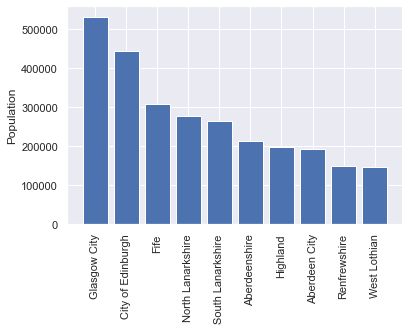

In [6]:
vc_ca = vc.groupby(['CAName'])['Population'].max()
vc_ca = vc_ca.sort_values(ascending = False)[:10]
plt.bar(vc_ca.index, vc_ca.values)
plt.xticks(rotation = 90)
plt.ylabel('Population')
plt.show()

While plotting the Population of different cities in Scotland  we could see thet Glasgow city has max population , after that second is Edinburgh then Fife and so on. Number of people getting vaccinated depends on population also. Council area with less population may end up receiving first dose as quickly as possible covering the 100% of the population.

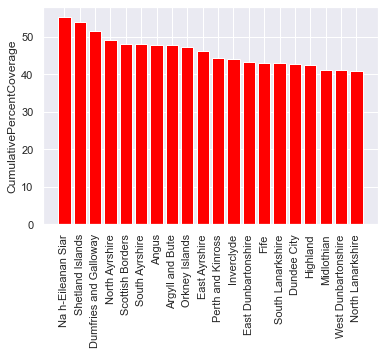

In [7]:
vc_cp = vc.groupby(['CAName'])['CumulativePercentCoverage'].max()
vc_cp = vc_cp.sort_values(ascending = False)[:20]
plt.bar(vc_cp.index, vc_cp.values, color = 'red')
plt.xticks(rotation = 90)
plt.ylabel('CumulativePercentCoverage')
plt.show()

When i tried plotting the Cumulative Percentage Coverage w.r.t. Council Areas, it showed that "Na h-Eileanan Siar" had maximum people vaccinated cumulativley w.r.t. its population. On second comes "Shetland Islands". Places like "Na h-Eileanan Siar", "Shetland Islands", "Dumfries and Galloway" are the area where more then 50% of population cumulatively has been vaccinated. 

In [8]:
vc.describe()

,Population,DoseQF,NumberVaccinated,NumberVaccinatedQF,PercentCoverage,CumulativeNumberVaccinated,CumulativeNumberVaccinatedQF,CumulativePercentCoverage
count,5940.000000,0.0,6126.000000,0.0,5940.000000,6126.000000,0.0,5940.000000
mean,142180.873064,NaN,321.128469,NaN,0.249216,10432.366634,NaN,8.204646
std,114459.477617,NaN,642.683326,NaN,0.434231,21370.367379,NaN,13.228659
min,18688.000000,NaN,0.000000,NaN,0.000000,0.000000,NaN,0.000000
25%,76005.000000,NaN,1.000000,NaN,0.000672,53.000000,NaN,0.057357
50%,100957.000000,NaN,38.000000,NaN,0.045585,1375.000000,NaN,1.532402
75%,193247.000000,NaN,336.750000,NaN,0.309763,9169.750000,NaN,9.745958
max,532454.000000,NaN,7030.000000,NaN,4.077272,174389.000000,NaN,55.225674


Summary Statistics: An average population of "142180" has around "321" people being vaccinated. Cumulative Percentage coverage being 8.20%. From a max population of "532454", 4.077 has been vaccinated and cumulative percentage been 55.225%. 

In [9]:
vc


,Date,CA,CAQF,CAName,Population,PopulationQF,Dose,DoseQF,NumberVaccinated,NumberVaccinatedQF,PercentCoverage,PercentCoverageQF,CumulativeNumberVaccinated,CumulativeNumberVaccinatedQF,CumulativePercentCoverage,CumulativePercentCoverageQF
0,2020-12-08,NaN,:,Unknown,NaN,z,Dose 1,NaN,2,NaN,NaN,z,2,NaN,NaN,z
1,2020-12-08,NaN,:,Unknown,NaN,z,Dose 2,NaN,0,NaN,NaN,z,0,NaN,NaN,z
2,2020-12-08,S12000005,NaN,Clackmannanshire,42594.0,NaN,Dose 1,NaN,68,NaN,0.159647,NaN,68,NaN,0.159647,NaN
3,2020-12-08,S12000005,NaN,Clackmannanshire,42594.0,NaN,Dose 2,NaN,0,NaN,0.000000,NaN,0,NaN,0.000000,NaN
4,2020-12-08,S12000006,NaN,Dumfries and Galloway,125617.0,NaN,Dose 1,NaN,33,NaN,0.026270,NaN,33,NaN,0.026270,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6121,2021-03-10,S12000048,NaN,Perth and Kinross,127529.0,NaN,Dose 2,NaN,249,NaN,0.195250,NaN,2994,NaN,2.347701,NaN
6122,2021-03-10,S12000049,NaN,Glasgow City,532454.0,NaN,Dose 1,NaN,1829,NaN,0.343504,NaN,174389,NaN,32.751937,NaN
6123,2021-03-10,S12000049,NaN,Glasgow City,532454.0,NaN,Dose 2,NaN,740,NaN,0.138979,NaN,13315,NaN,2.500686,NaN
6124,2021-03-10,S12000050,NaN,North Lanarkshire,278534.0,NaN,Dose 1,NaN,75,NaN,0.026927,NaN,114097,NaN,40.963401,NaN


In [10]:
import plotly.express as px


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

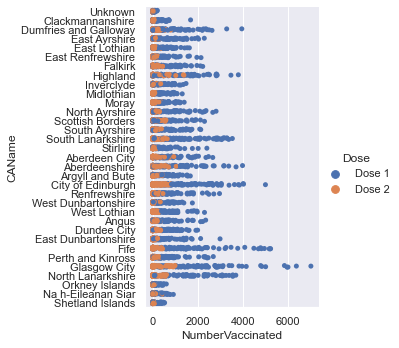

In [12]:
sns.catplot(x="NumberVaccinated",y = "CAName", data = vc,hue = "Dose")
plt.show()


In the above graph when a plot was generated between the council areas, and the number of people being given Dose of vaccines, i could infer that all the council areas present in list have started receiving their first dose and even the sencond dose. Maximum percentage of people who had received their first doses are in Glasgow City, then Fife and City of Edinburgh. More then 6000 people have received their first doses in Glasgow City and around 1000 have received their second doses.

In Fife around 5000 people have received first doses and less then 1000 have received second dose. 

City of Edinburgh: Around 5000 poople have received Dose 1, more then 500 have received Dose2.

In [13]:
print(vc.mean())


Population                      142180.873064
DoseQF                                    NaN
NumberVaccinated                   321.128469
NumberVaccinatedQF                        NaN
PercentCoverage                      0.249216
CumulativeNumberVaccinated       10432.366634
CumulativeNumberVaccinatedQF              NaN
CumulativePercentCoverage            8.204646
dtype: float64


On an average population of Scotland being 142180, 321 have been vaccinated, with a cumulative percentage coverage of 8.20.

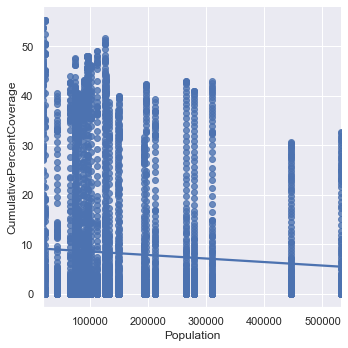

-0.06136273249063941


In [15]:
sns.lmplot(x = 'Population', y = 'CumulativePercentCoverage', data = vc, ci = None)
plt.show()
print(vc['Population'].corr(vc['CumulativePercentCoverage']))

When linear model was generated around "Population" and "Cumulative Percentage Coverage", we are getting a correlation of -0.06 which means that both the variables move inversely. If population of an area increases the Cumulative Percentage Coverage will reduce. Council area with less population get vaccination a bit faster hence covering the more share of total population of that area. 

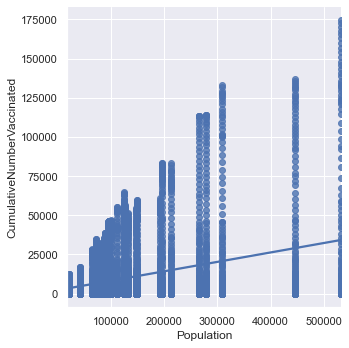

0.3188520171024888


In [16]:
sns.lmplot(x = 'Population', y = 'CumulativeNumberVaccinated', data = vc, ci = None)
plt.show()
print(vc['Population'].corr(vc['CumulativeNumberVaccinated']))

When a linear model was developed around the Population and Cumulative Number Vaccinated, a correlation of 0.31 was generated, it shows that both variables are positively correlated. Cumulative number of people getting vaccinated is increasing with population.

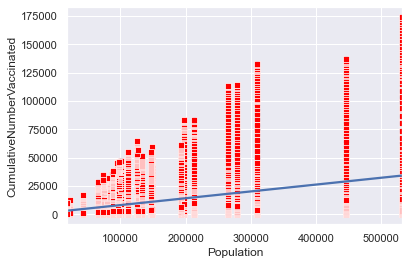

In [17]:
sns.regplot(x = 'Population', y = 'CumulativeNumberVaccinated', data = vc, ci = None)
sns.scatterplot(x = 'Population', y = 'CumulativeNumberVaccinated', data = vc, color = "red", marker = "s")
plt.show()

Regression plot: When a regression plot was developed around these two variables it shows a positive slope, the graph shows uphill pattern so both variables are related positively. Council areas with high population the cumulative vaccination will be high.

In [ ]:
vc

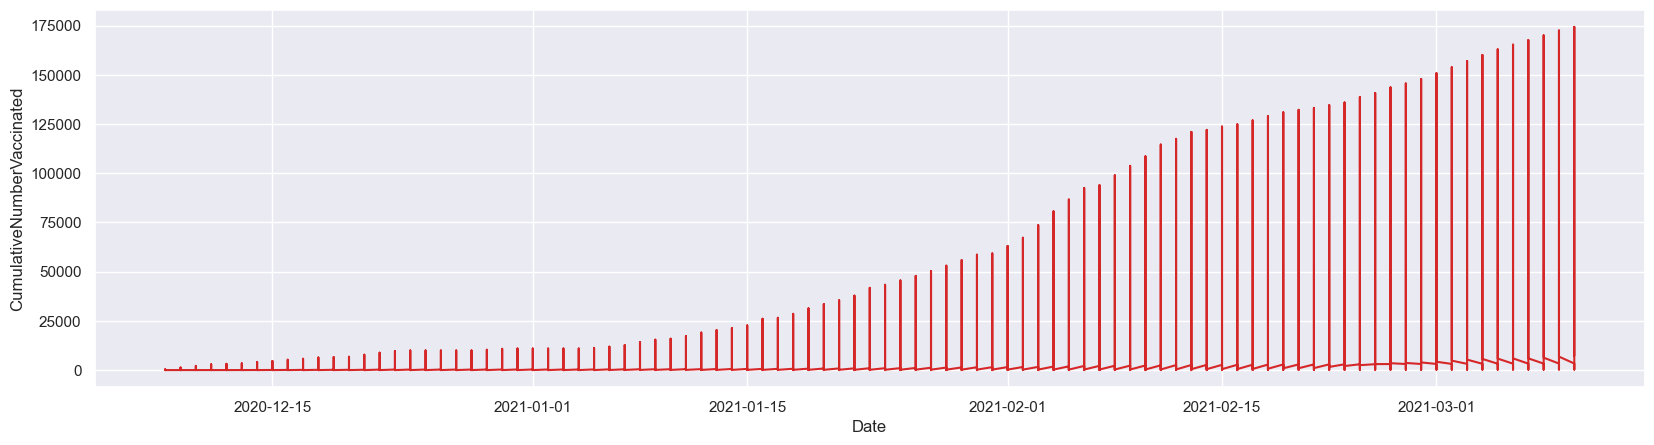

In [18]:
def plot_vc(vc , x,y, title="", xlabel = 'Date', ylabel = 'CumulativeNumberVaccinated', dpi=100): 
    plt.figure(figsize=(20,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
plot_vc(vc, x = vc.Date, y=vc.CumulativeNumberVaccinated, title='')    
    

Time Series Analysis: Over the time the cumulative vaccinations has shown an increasing pattern. 